<a href="https://colab.research.google.com/github/subsax/Default_loan_predictor/blob/main/Copy_of_Default_loan_predictor_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import KNNImputer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
#load the data
Dataframe = pd.read_csv(r"/content/sample_data/Dataset.csv",low_memory=False)
Dataframe

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116156,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617437,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077498546,0.0979,0.0,2.0,0



## **Data Analysis**

In [ ]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
Dataframe.describe()

In [ ]:
def column_not_binary(df, column_name):

    #True if the column contains values other than 0 and 1, False otherwise.

    unique_values = df[column_name].unique()
    return len(unique_values) > 2 or (0 not in unique_values) or (1 not in unique_values)



In [ ]:
# Check if the specific column contains values other than 0 and 1
result = column_not_binary(Dataframe, 'Default')
if result:
    print("The column contains values other than 0 and 1.")
else:
    print("The column only contains 0 and 1.")


The column only contains 0 and 1.


In [ ]:
def calculate_missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})

    return missing_value_df

# Calculate percentage of missing values in each column of the DataFrame
missing_percentage_result = calculate_missing_percentage(Dataframe)
print(missing_percentage_result)


                                           column_name  percent_missing
ID                                                  ID         0.000000
Client_Income                            Client_Income         2.960051
Car_Owned                                    Car_Owned         2.938715
Bike_Owned                                  Bike_Owned         2.974002
Active_Loan                                Active_Loan         2.983029
House_Own                                    House_Own         3.004366
Child_Count                                Child_Count         2.985491
Credit_Amount                            Credit_Amount         2.980567
Loan_Annuity                              Loan_Annuity         3.948923
Accompany_Client                      Accompany_Client         1.432839
Client_Income_Type                  Client_Income_Type         3.037191
Client_Education                      Client_Education         2.991236
Client_Marital_Status            Client_Marital_Status         2

#here we can see the percentage of missing values in the Own_House_Age is 65%, Client_Occupation is 34%, Score_Source_1 is 56% and Social_Circle_Default is 50% and Credit_bureau is 15%

Now checking if we can calcuulate the Client_Occupation with respect to another occupation if there is some link

In [ ]:
Dataframe.loc[:,["Client_Occupation","Type_Organization"]]

In [ ]:
pivot_table = Dataframe.pivot_table(index='Client_Occupation', columns='Type_Organization', aggfunc=len, fill_value="nan")

In [ ]:
pivot_table

In [ ]:
df1 = df1.drop(columns=['ID','Own_House_Age','Client_Occupation','Score_Source_1','Score_Source_3','Credit_Bureau','Social_Circle_Default'])

In [ ]:
df1=Dataframe.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [ ]:
df1.describe()

In [ ]:
Total_1s = (df['Default'] == 1).sum()
Total_0s = (df['Default'] == 0).sum()

print(f"the total 1 is : {Total_1s}")
print(f"the total 0 is : {Total_0s}")

In [ ]:
def clean_numeric_values(df, column_name):
    # Remove rows with non-numeric values or special characters
    df = df[pd.to_numeric(df[column_name], errors='coerce').notnull()]

    return df


In [ ]:
df1['Loan_Annuity'] = pd.to_numeric(df1['Loan_Annuity'], errors='coerce')
df1['Credit_Amount'] = pd.to_numeric(df1['Credit_Amount'], errors='coerce')
df1['Client_Income'] = pd.to_numeric(df1['Client_Income'], errors='coerce')
df1['Client_Income'] = pd.to_numeric(df1['Client_Income'], errors='coerce')


In [ ]:
df1['Loan_Annuity'] = df1['Loan_Annuity'].fillna(df1['Loan_Annuity'].median())


In [ ]:
df1['Credit_Amount'] = df1['Credit_Amount'].fillna(df1['Loan_Annuity'].median())

In [ ]:
df1['Credit_Amount'] = df1['Credit_Amount'].fillna(df1['Loan_Annuity'].median())


In [ ]:
Total_CA_defaults = df1[df1['Credit_Amount'] == "$"]['Default'].sum()
Total_CA_defaults

0

In [ ]:
Total_LA_defaults = df1[df1['Loan_Annuity'] == "#VALUE!"]['Default'].sum()
Total_LA_defaults

0

<Axes: xlabel='Default', ylabel='Client_Income'>

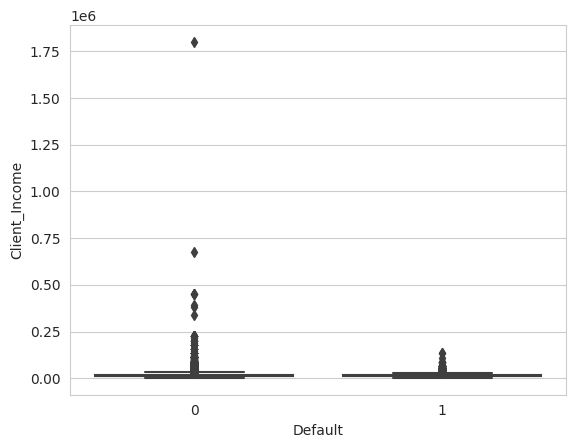

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x = 'Default', y = 'Client_Income', data = df1)

In [ ]:
#changing the datatype of the columns if it contains any values other than integers

df1['Loan_Annuity'] = pd.to_numeric(df1['Loan_Annuity'], errors='coerce')
df1['Credit_Amount'] = pd.to_numeric(df1['Credit_Amount'], errors='coerce')
df1['Client_Income'] = pd.to_numeric(df1['Client_Income'], errors='coerce')
df1['Client_Income'] = pd.to_numeric(df1['Client_Income'], errors='coerce')

<Axes: xlabel='Default', ylabel='Loan_Annuity'>

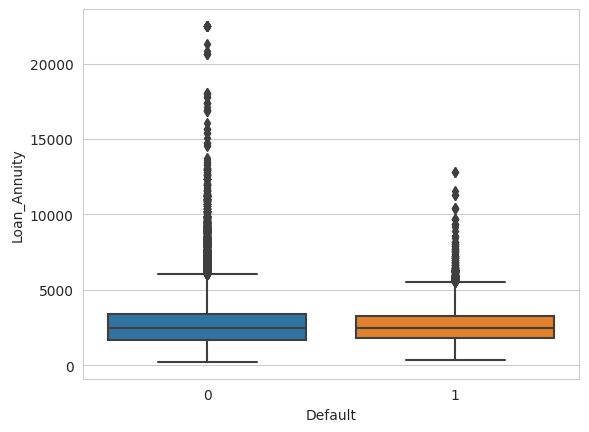

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x = 'Default', y = 'Loan_Annuity', data = df1)

<Axes: xlabel='Default', ylabel='Credit_Amount'>

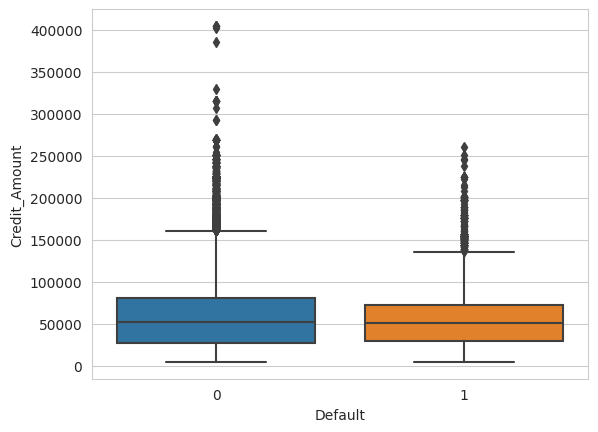

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x = 'Default', y = 'Credit_Amount', data = df1)

<Axes: xlabel='Default', ylabel='Age_Days'>

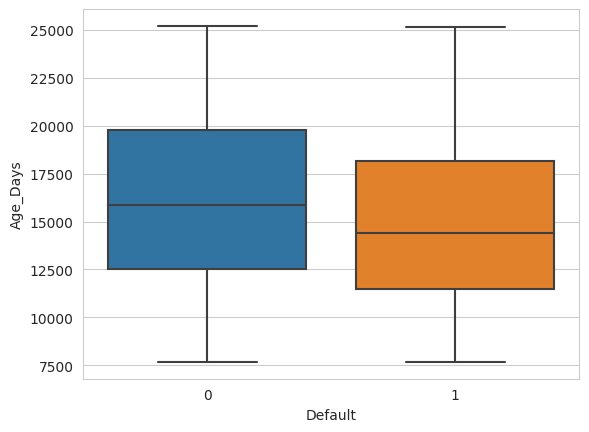

In [ ]:
df1['Age_Days'] = pd.to_numeric(df1['Age_Days'], errors='coerce')
sns.set_style("whitegrid")

sns.boxplot(x = 'Default', y = 'Age_Days', data = df1)


<Axes: xlabel='Default', ylabel='ID_Days'>

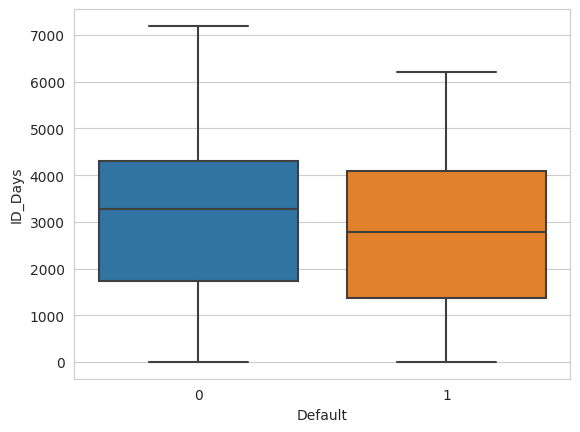

In [ ]:
df1['ID_Days'] = pd.to_numeric(df1['ID_Days'], errors='coerce')
sns.set_style("whitegrid")

sns.boxplot(x = 'Default', y = 'ID_Days', data = df1)


<Axes: xlabel='Default', ylabel='Registration_Days'>

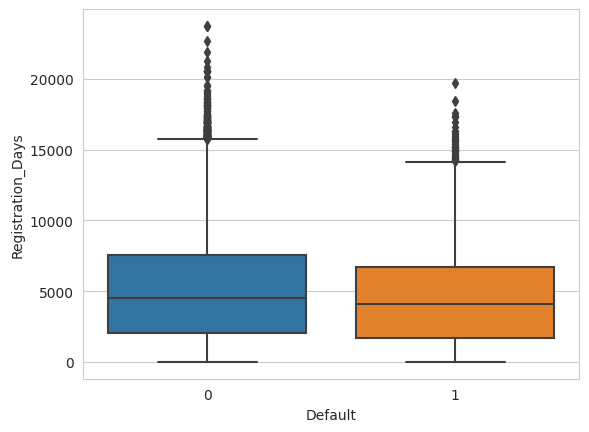

In [ ]:
df1['Registration_Days'] = pd.to_numeric(df1['Registration_Days'], errors='coerce')
sns.set_style("whitegrid")

sns.boxplot(x = 'Default', y = 'Registration_Days', data = df1)

<Axes: xlabel='Default', ylabel='Employed_Days'>

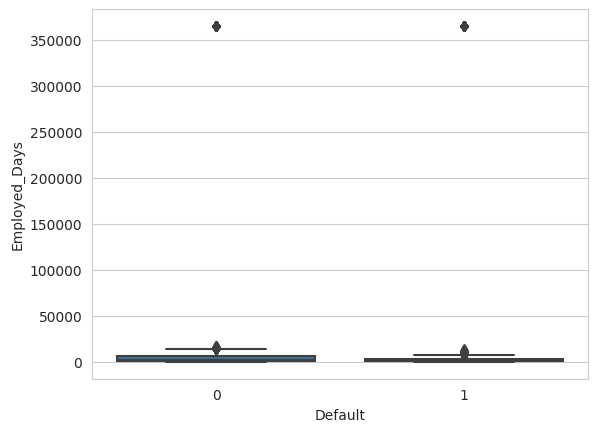

In [ ]:

df1['Employed_Days'] = pd.to_numeric(df1['Employed_Days'], errors='coerce')
sns.set_style("whitegrid")

sns.boxplot(x = 'Default', y = 'Employed_Days', data = df1)

<Axes: xlabel='Default', ylabel='ID_Days'>

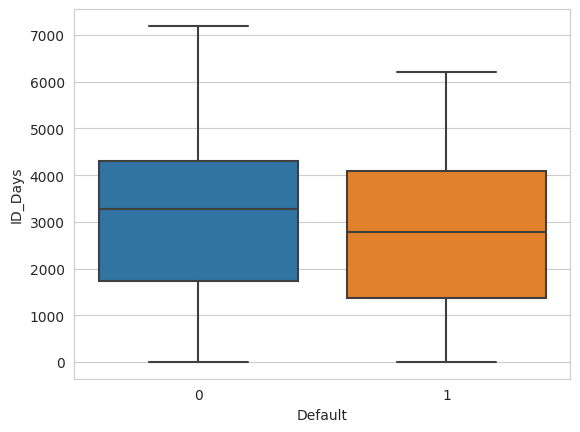

In [ ]:
df1['ID_Days'] = pd.to_numeric(df1['ID_Days'], errors='coerce')
sns.set_style("whitegrid")

sns.boxplot(x = 'Default', y = 'ID_Days', data = df1)

In [ ]:
#created the IQR function to count the outliers

def IQR_method1 (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers

In [ ]:
feature_list=['Client_Income','Loan_Annuity','Credit_Amount','Age_Days','Employed_Days','Registration_Days','ID_Days']
IQR_method1(df1,1,feature_list)

In [ ]:
#Adding the values in null by checking the outliers in each column so if so many outliers then using the Median and if no outliers then using mean
df1['Client_Income'] = df1['Client_Income'].fillna(df1['Client_Income'].median())
df1['Credit_Amount'] = df1['Credit_Amount'].fillna(df1['Credit_Amount'].median())
df1['Loan_Annuity'] = df1['Loan_Annuity'].fillna(df1['Loan_Annuity'].median())
df1['Registration_Days'] = df1['Registration_Days'].fillna(df1['Registration_Days'].median())
df1['Employed_Days'] = df1['Employed_Days'].fillna(df1['Employed_Days'].median())

In [ ]:
df1['ID_Days'] = df1['ID_Days'].fillna(df1['ID_Days'].mean())
df1['Age_Days'] = df1['Age_Days'].fillna(df1['Age_Days'].mean())

In [ ]:
#here created two seperate dataframe for Categorical and Non -categorical columns to analyze seperately

numeric_df = df1.select_dtypes(include=[np.number])
categorical_df = df1.select_dtypes(exclude=[np.number])

In [ ]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Client_Income             121856 non-null  float64
 1   Car_Owned                 118275 non-null  float64
 2   Bike_Owned                118232 non-null  float64
 3   Active_Loan               118221 non-null  float64
 4   House_Own                 118195 non-null  float64
 5   Child_Count               118218 non-null  float64
 6   Credit_Amount             121856 non-null  float64
 7   Loan_Annuity              121856 non-null  float64
 8   Age_Days                  121856 non-null  float64
 9   Employed_Days             121856 non-null  float64
 10  Registration_Days         121856 non-null  float64
 11  ID_Days                   121856 non-null  float64
 12  Mobile_Tag                121856 non-null  int64  
 13  Homephone_Tag             121856 non-null  i

In [ ]:
categorical_df

,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
0,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,Yes,Yes,Self-employed
1,Alone,Service,Graduation,M,Male,CL,Home,0.008575,Yes,Yes,Government
2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,Yes,Yes,Self-employed
3,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,Yes,Yes,XNA
4,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,Yes,Yes,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...,...
121851,Relative,Service,Secondary,M,Female,CL,Home,0.031329,Yes,No,Business Entity Type 2
121852,Alone,Commercial,Graduation,M,Female,CL,Home,0.018209,Yes,Yes,Self-employed
121853,Alone,Govt Job,Secondary,M,Male,CL,Home,0.008068,No,No,Trade: type 6
121854,Alone,Service,Graduation,M,Female,CL,Home,0.028663,Yes,Yes,Business Entity Type 3


In [ ]:
#converting using label encoder
 categorical_df = categorical_df.apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index))

In [ ]:
#filling the missing values using the using KNN imputer for categorical data
def knn_impute_categorical(df):
    # Copy the original dataframe to preserve the original data
    df_copy = df.copy()

    # Identify categorical columns for imputation
    categorical_cols = df_copy.select_dtypes(include=['object']).columns.tolist()

    # Convert categorical columns to numerical using label encoding
    for col in categorical_cols:
        df_copy[col] = df_copy[col].astype('category').cat.codes

    # Initialize KNN imputer with desired neighbors (n_neighbors)
    imputer = KNNImputer(n_neighbors=3)

    # Perform KNN imputation
    df_imputed = imputer.fit_transform(df_copy)

    # Convert back the imputed numerical values to categorical values
    df_imputed = pd.DataFrame(df_imputed, columns=df_copy.columns)
    for col in categorical_cols:
        df_imputed[col] = pd.Categorical.from_codes(df_imputed[col].round(), categories=df[col].unique())

    return df_imputed

# Assuming df is your DataFrame with categorical columns requiring imputation
# Replace df with your actual DataFrame



In [ ]:
imputed_df_catgerical = knn_impute_categorical(categorical_df)

In [ ]:
imputed_df_catgerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accompany_Client            121856 non-null  float64
 1   Client_Income_Type          121856 non-null  float64
 2   Client_Education            121856 non-null  float64
 3   Client_Marital_Status       121856 non-null  float64
 4   Client_Gender               121856 non-null  float64
 5   Loan_Contract_Type          121856 non-null  float64
 6   Client_Housing_Type         121856 non-null  float64
 7   Population_Region_Relative  121856 non-null  float64
 8   Client_Permanent_Match_Tag  121856 non-null  float64
 9   Client_Contact_Work_Tag     121856 non-null  float64
 10  Type_Organization           121856 non-null  float64
dtypes: float64(11)
memory usage: 10.2 MB


In [ ]:
#Filling the missing values of remaing non categorical data using KNN imputor
def knn_impute_numeric(df):
    # Copy the original dataframe to preserve the original data
    df_imputed = df.copy()

    # Apply KNNImputer to all numeric columns
    imputer = KNNImputer()
    df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df_imputed.columns)

    return df_imputed




In [ ]:
imputed_df = knn_impute_numeric(numeric_df)

In [ ]:
imputed_df.shape


(121856, 25)

In [ ]:
#now created a new data frame by filling the imputed values
Intrim_df = pd.concat([imputed_df, imputed_df_catgerical],axis=1)

In [ ]:
Intrim_df.shape


(121856, 36)

In [ ]:
#here created a checkpoint so that if anything goes wrong the dataframe should not be corrupted (it can be removed)
Df_final=Intrim_df.copy()

In [ ]:
#again the checkpoint to check the null values
null_count_default1 = Df_final['Default'].isnull().sum()
null_count_default1

0

**Now here splitting the dataset intwo dataframe with 1's and 0's why I have done to have equal number of ratio  while creating the traing and test data.**

Now I havent using any resampling and SMOTE or anyother technique to balanced the data as it uses the brute force mechanism and in now days the deep learning models/machine learning models are so much matured that it can handle the imbalance data at some point



In [ ]:
Default_0 = Df_final[Df_final['Default'] == 0]
Default_1 = Df_final[Df_final['Default'] == 1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_0_df, test__0_df = train_test_split(Default_0, test_size=0.3, random_state=42)

In [ ]:
train_1_df, test__1_df = train_test_split(Default_1, test_size=0.3, random_state=42)

In [ ]:
Train_df=pd.concat([train_0_df, train_1_df])
Test_df=pd.concat([test__0_df, test__1_df])

In [ ]:
Train_df.shape


(85298, 33)

In [ ]:
Test_df.shape

(36558, 33)

In [ ]:
X_train = Train_df.drop("Default", axis = 1)
y_train= Train_df[["Default"]]

In [ ]:
X_test = Test_df.drop("Default", axis = 1)
y_test= Test_df[["Default"]]


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
X_train_s.shape

(85298, 32)

In [ ]:
# Initialize a Sequential model
model = Sequential()

In [ ]:
model = Sequential([keras.layers.Dense(256, activation = "relu",input_shape = [32]),
                   keras.layers.Dropout(0.3),
                  keras.layers.Dense(256, activation = "relu"),
                   keras.layers.Dropout(0.3),
                   keras.layers.Dense(1, activation="sigmoid")])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
result = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    batch_size=256,
    epochs=1000,
    verbose=1,
)

Epoch 1/1000
334/334 [==============================] - 8s 23ms/step - loss: 0.2576 - accuracy: 0.9195 - val_loss: 0.2761 - val_accuracy: 0.9191
Epoch 2/1000
334/334 [==============================] - 6s 18ms/step - loss: 0.2565 - accuracy: 0.9194 - val_loss: 0.2748 - val_accuracy: 0.9192
Epoch 3/1000
334/334 [==============================] - 9s 26ms/step - loss: 0.2557 - accuracy: 0.9198 - val_loss: 0.2773 - val_accuracy: 0.9193
Epoch 4/1000
334/334 [==============================] - 6s 17ms/step - loss: 0.2549 - accuracy: 0.9200 - val_loss: 0.2770 - val_accuracy: 0.9193
Epoch 5/1000
334/334 [==============================] - 6s 18ms/step - loss: 0.2538 - accuracy: 0.9199 - val_loss: 0.2748 - val_accuracy: 0.9192
Epoch 6/1000
334/334 [==============================] - 6s 17ms/step - loss: 0.2525 - accuracy: 0.9203 - val_loss: 0.2787 - val_accuracy: 0.9193
Epoch 7/1000
334/334 [==============================] - 4s 11ms/step - loss: 0.2513 - accuracy: 0.9204 - val_loss: 0.2755 - val_ac

In [ ]:
predictions = (model.predict(X_test_s) > 0.5).astype("int32")

1143/1143 [==============================] - 4s 3ms/step


In [ ]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9226981782373215
Precision: 0.6379310344827587
Recall: 0.1002031144211239
F1 Score: 0.17320070216500874
